In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os

In [2]:
heart_df = pd.read_csv('dataset/heart.csv')

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
target = heart_df['HeartDisease']

In [7]:
heart_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [8]:
# get all columns that are not numbers
categorical = heart_df.select_dtypes(['object']).columns
categorical

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Preprocessing Dataset

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
heart_df[categorical] = ordinal_encoder.fit_transform(heart_df[categorical])


In [10]:
y = heart_df['HeartDisease']
x = heart_df.drop(['HeartDisease'], axis=1)

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

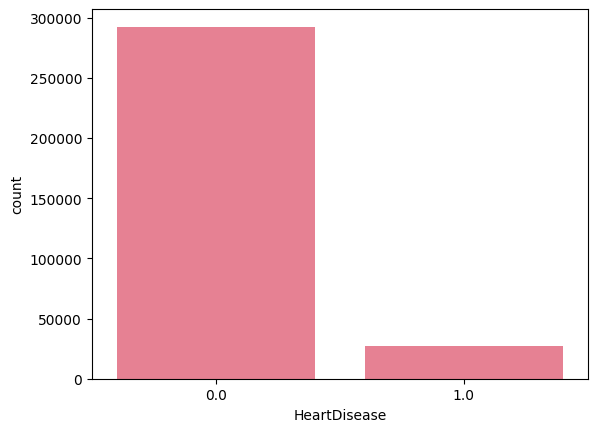

In [11]:
sns.countplot(x='HeartDisease', data=heart_df)

In [12]:
from imblearn.under_sampling import OneSidedSelection, RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

# BETTER WAY
# oss = OneSidedSelection(random_state=42, n_jobs=-1)
# x_res, y_res = oss.fit_resample(x, y)

# rus = RandomUnderSampler(random_state=42)
# x_res, y_res = rus.fit_resample(x, y)

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x, y)

In [13]:
heart_df_res = pd.concat([x_res, y_res], axis=1)

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

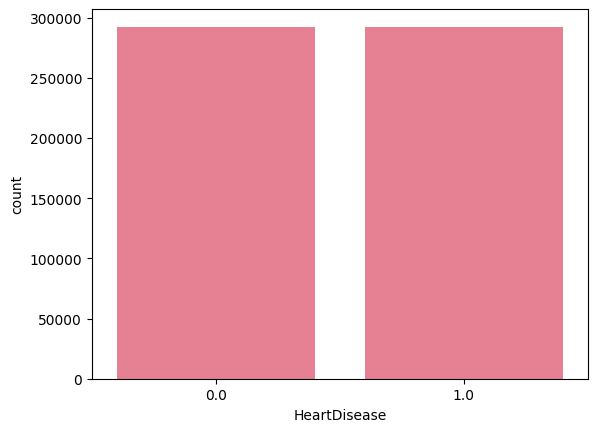

In [14]:
sns.countplot(x='HeartDisease', data=heart_df_res)

In [15]:
from sklearn.model_selection import train_test_split

target = heart_df_res['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(heart_df_res.drop('HeartDisease', axis=1), target, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
train_df = pd.DataFrame(X_train, columns=heart_df_res.drop('HeartDisease', axis=1).columns)
train_df['HeartDisease'] = y_train.values
train_df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-0.782633,-0.982354,-0.244667,-0.320519,-0.439056,-0.496062,-0.564246,0.94785,-2.293046,0.460496,-0.563557,0.632805,1.304027,-0.695318,-0.42734,-0.289329,-0.392441,0.0
1,-0.572187,1.017963,-0.244667,-0.320519,-0.539566,-0.496062,-0.564246,0.94785,0.963091,0.460496,-0.563557,0.632805,1.304027,-0.071187,-0.42734,-0.289329,2.548151,1.0
2,-0.248781,-0.982354,-0.244667,-0.320519,-0.539566,-0.496062,-0.564246,0.94785,0.667079,0.460496,-0.563557,0.632805,1.304027,0.552944,-0.42734,-0.289329,-0.392441,1.0
3,-0.459227,1.017963,-0.244667,3.119941,-0.137524,0.090095,1.772276,0.94785,0.075054,0.460496,-0.563557,-1.580266,0.581277,-0.695318,-0.42734,-0.289329,-0.392441,1.0
4,-0.313772,-0.982354,-0.244667,-0.320519,-0.539566,-0.496062,-0.564246,0.94785,0.963091,0.460496,0.612883,0.632805,-0.141473,-0.071187,-0.42734,-0.289329,2.548151,1.0


In [18]:
test_df = pd.DataFrame(X_test, columns=heart_df_res.drop('HeartDisease', axis=1).columns)
test_df['HeartDisease'] = y_test.values
test_df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0.692036,1.017963,-0.244667,3.119941,0.465540,-0.496062,-0.564246,-1.055019,0.075054,0.460496,-0.563557,0.632805,-0.141473,-1.319449,-0.42734,-0.289329,-0.392441,1.0
1,0.543486,1.017963,-0.244667,-0.320519,2.475753,-0.496062,-0.564246,0.947850,0.667079,-2.103983,1.789323,-1.580266,-0.864222,-0.695318,-0.42734,-0.289329,-0.392441,0.0
2,-0.657294,-0.982354,-0.244667,-0.320519,-0.539566,-0.496062,-0.564246,-1.055019,-1.997034,-1.249156,-0.563557,0.632805,-0.141473,3.049467,-0.42734,-0.289329,-0.392441,0.0
3,1.337301,-0.982354,-0.244667,-0.320519,-0.539566,-0.496062,-0.564246,-1.055019,-0.812984,-0.394330,1.789323,0.632805,1.304027,-0.695318,-0.42734,-0.289329,-0.392441,0.0
4,-0.346267,1.017963,-0.244667,3.119941,-0.338545,-0.144368,-0.564246,0.947850,0.963091,0.460496,1.789323,0.632805,-0.864222,0.552944,-0.42734,3.456273,2.548151,1.0


# Exploratory Data Analysis


<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

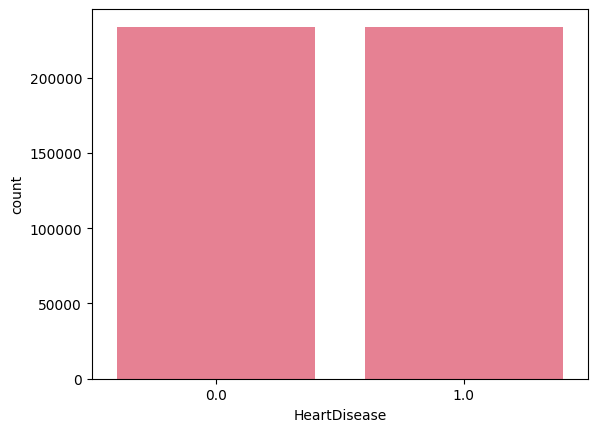

In [19]:
sns.countplot(x='HeartDisease', data=train_df)

<AxesSubplot: >

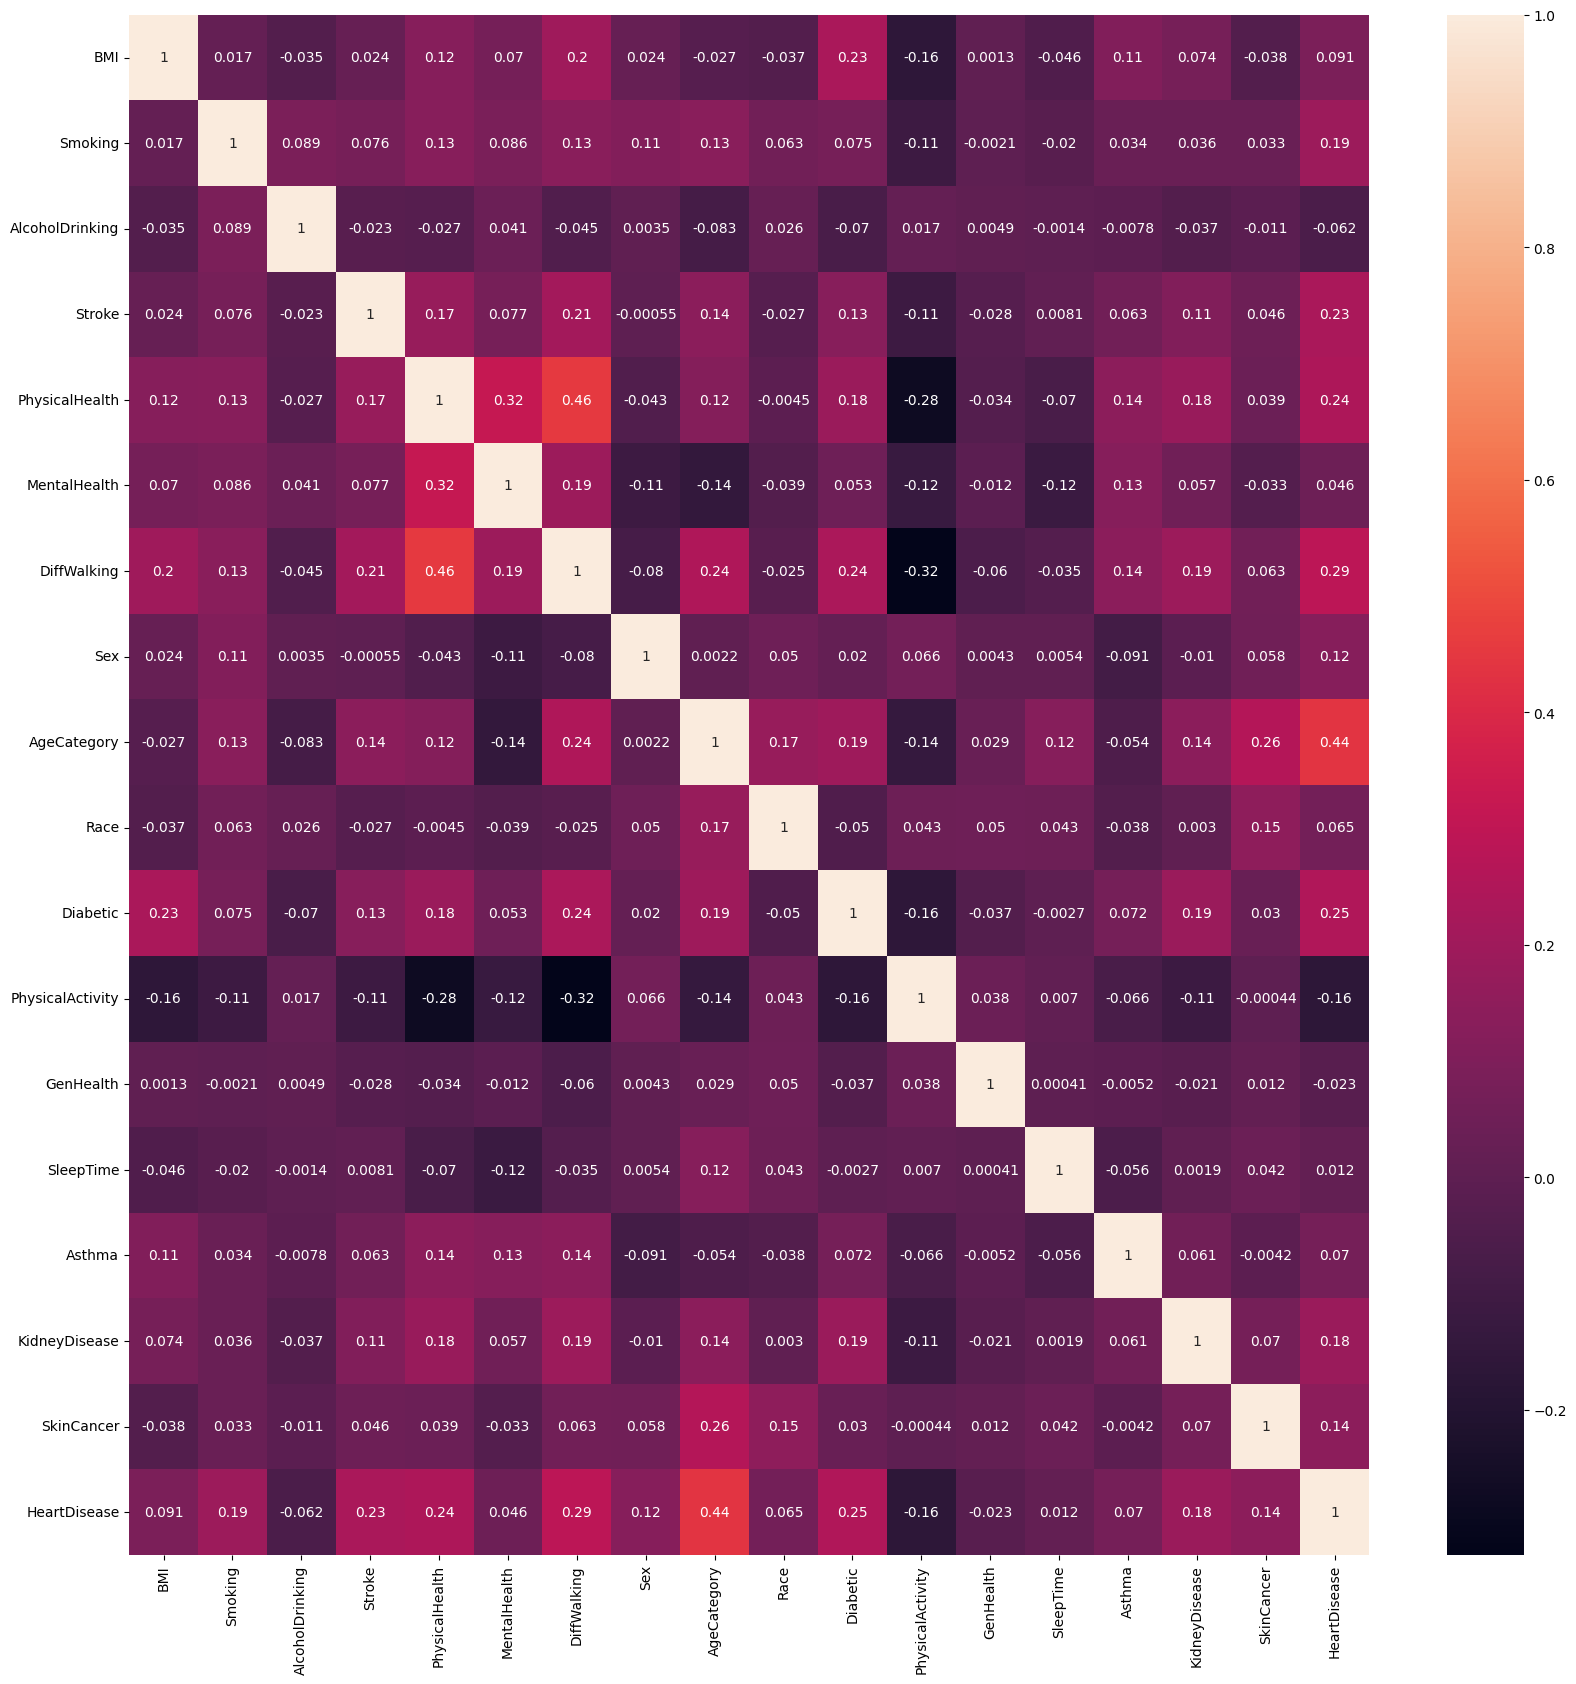

In [20]:
corr = train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

In [21]:
corr = corr.abs().unstack()
corr = corr.sort_values(ascending=False)
corr = corr[corr >= 0.1]
print(corr["HeartDisease"])

HeartDisease        1.000000
AgeCategory         0.439992
DiffWalking         0.290239
Diabetic            0.253366
PhysicalHealth      0.243659
Stroke              0.230498
Smoking             0.190699
KidneyDisease       0.183367
PhysicalActivity    0.164481
SkinCancer          0.141808
Sex                 0.124847
dtype: float64


# Visualize Range of Values for Each Column

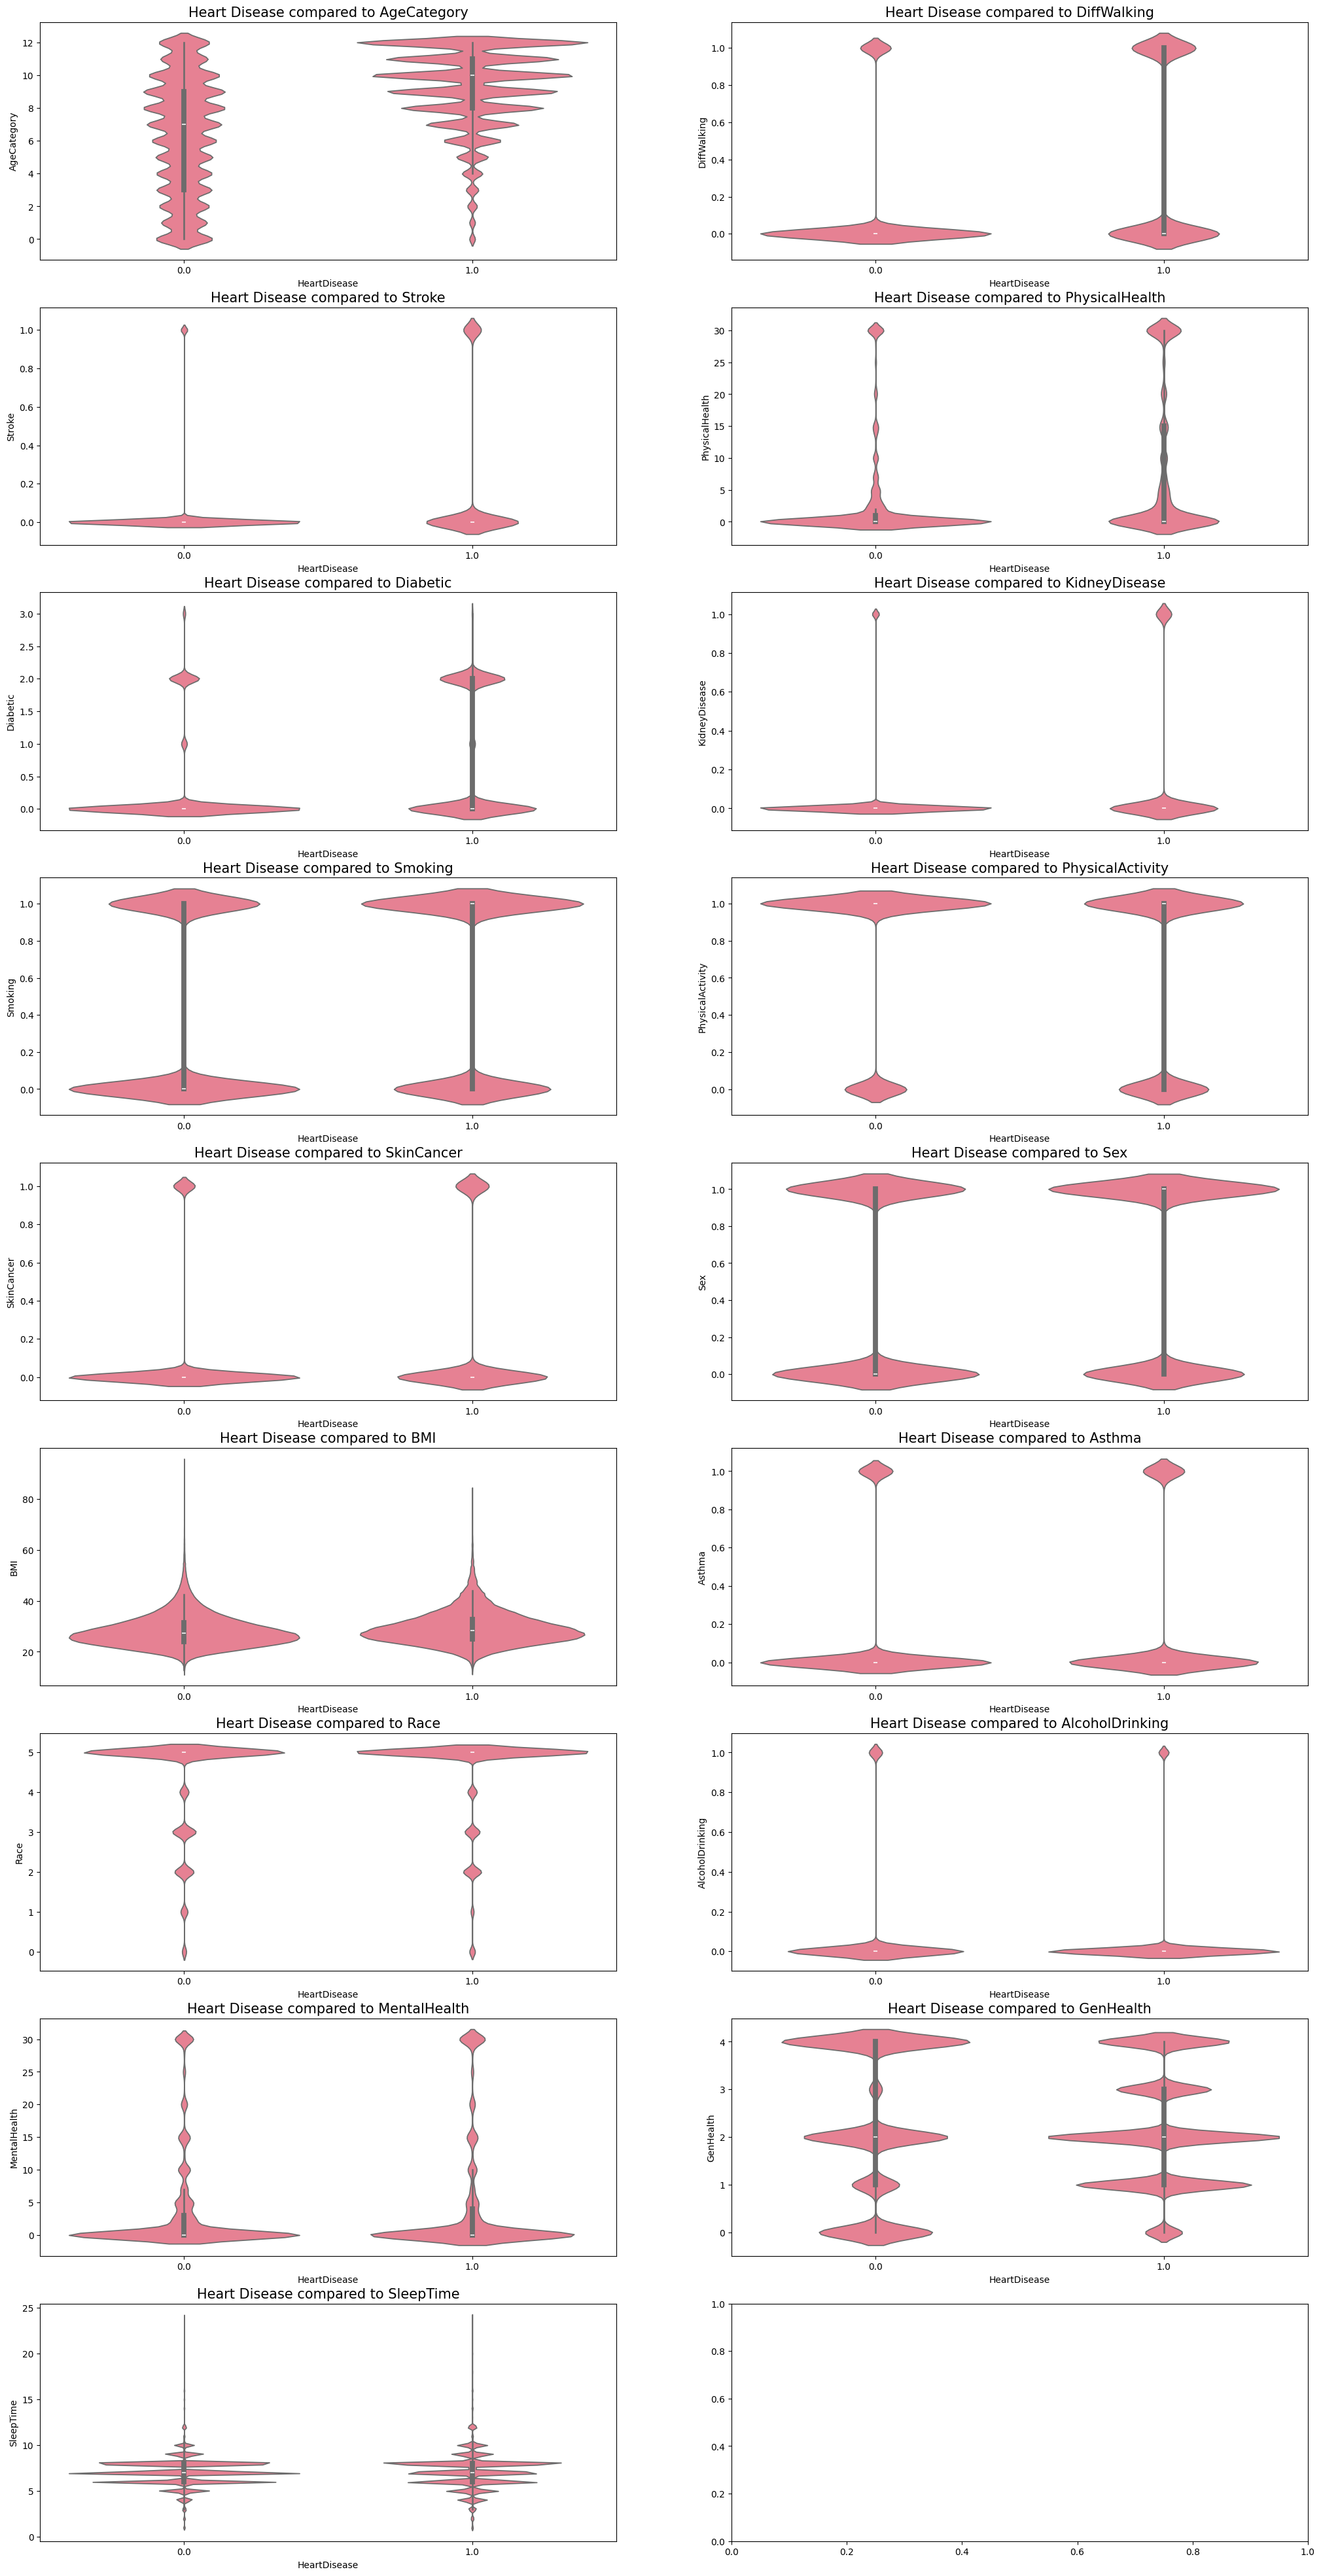

In [22]:
important_features = ["AgeCategory", "DiffWalking", "Stroke", "PhysicalHealth", "Diabetic", "KidneyDisease", "Smoking", "PhysicalActivity", "SkinCancer", "Sex", "BMI", "Asthma", "Race", "AlcoholDrinking", "MentalHealth", "GenHealth", "SleepTime"]

num_cols = 2
num_rows = int((len(important_features) +1) / num_cols)

axs, fig = plt.subplots(num_rows, num_cols, figsize=(25, 50))

unscaled_train_x = scaler.inverse_transform(train_df.drop('HeartDisease', axis=1))
unscaled_train_df = pd.DataFrame(unscaled_train_x, columns=heart_df_res.drop('HeartDisease', axis=1).columns)
unscaled_train_df['HeartDisease'] = y_train.values

for i, feature in enumerate(important_features):
    sns.violinplot(x="HeartDisease", y=feature, data=unscaled_train_df, ax=fig[i // num_cols, i % num_cols])
    fig[i // num_cols, i % num_cols].set_title(f"Heart Disease compared to {feature}", fontsize=15)

    

# Train ML Models


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
report = classification_report(y_train, rf.predict(X_train))
print(report)

report = classification_report(y_test, rf.predict(X_test))
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    233937
         1.0       0.99      1.00      1.00    233938

    accuracy                           1.00    467875
   macro avg       1.00      1.00      1.00    467875
weighted avg       1.00      1.00      1.00    467875

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     58485
         1.0       0.94      1.00      0.97     58484

    accuracy                           0.97    116969
   macro avg       0.97      0.97      0.97    116969
weighted avg       0.97      0.97      0.97    116969



# Explainaibility

In [25]:
import shap

shap.initjs()

In [26]:
explainer = shap.TreeExplainer(rf)

choosen_instance = test_df[0:1000]
shap_values = explainer.shap_values(choosen_instance, approximate=True)


In [29]:
len(shap_values)

2

In [32]:
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

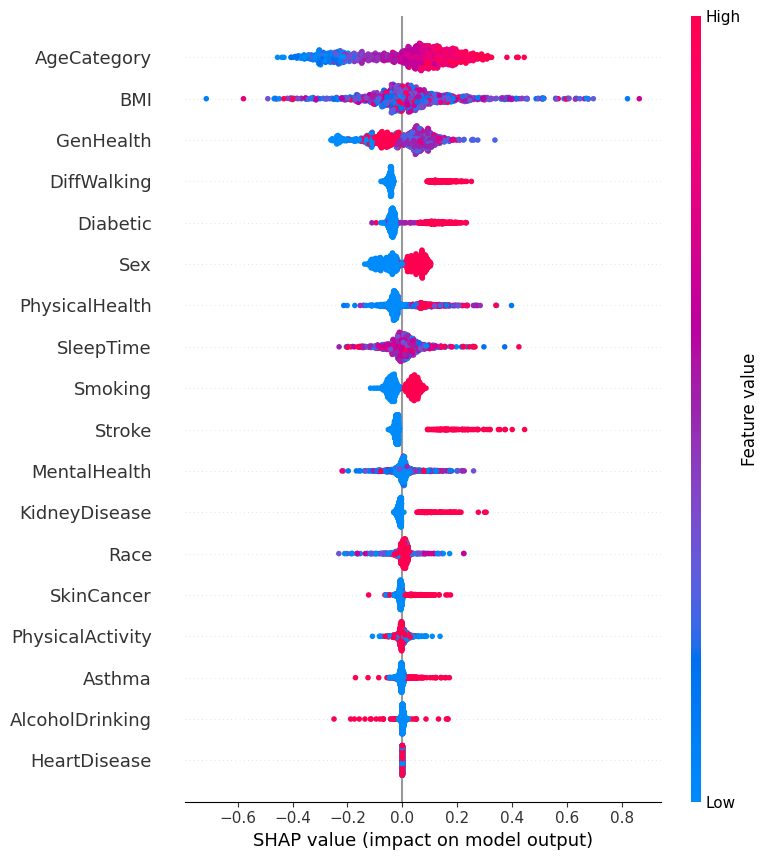

In [33]:
shap.summary_plot(shap_values[1], choosen_instance)